In [1]:
# Reload the notebook if an external file is updated
%load_ext autoreload
%autoreload 2

import sys

from pathlib import Path

path = str(Path.cwd().parent)
sys.path.append(path)

In [2]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

from constant import DATASET, SETTINGS
from datatype.axes import SpectrogramAxes
from datatype.dataset import Dataset
from datatype.settings import Settings
from datatype.signal import Signal
from datatype.spectrogram import Linear, Mel, Spectrogram
from io import BytesIO
from IPython.display import display
from PIL import Image, ImageDraw, ImageEnhance, ImageFilter, ImageFont, ImageOps
from plot import (
    CutoffSpectrogram,
    GenericSpectrogram,
    LusciniaSpectrogram
)
from wand.image import Image as ImageMagick

In [3]:
def create_image(buffer):
    if isinstance(buffer, np.ndarray):
        image = Image.fromarray(buffer)
    else:
        image = Image.open(buffer)
    
    return image

In [4]:
def preprocess_image(spectrogram):
    with ImageMagick.from_array(~spectrogram) as image:
        image.despeckle()

        image.opaque_paint(
            target='white',
            fill='white',
            fuzz=0.30 * image.quantum_range,
            invert=False
        )

        image.gamma(0.6)

        blob = image.make_blob(format='png')

        buffer = BytesIO(blob)
        return buffer.getvalue()

In [5]:
path = SETTINGS.joinpath('spectrogram.json')
settings = Settings.from_file(path)

In [6]:
path = SETTINGS.joinpath('dereverberate.json')
dereverberate = Settings.from_file(path)

In [7]:
path = DATASET.joinpath('DbWY_STE2017/recordings/STE02_DbWY2017.wav')
signal = Signal(path)

# signal.normalize()
# signal.dereverberate(dereverberate)

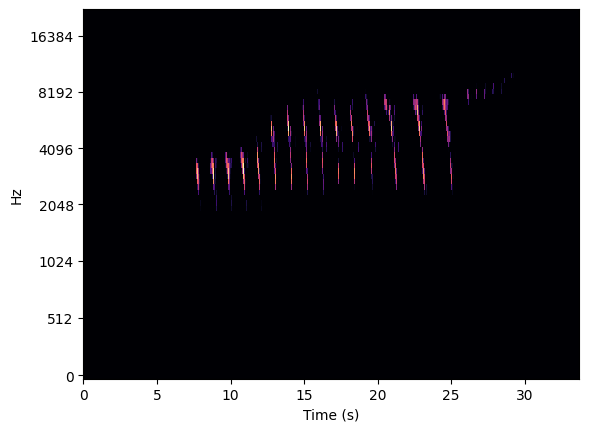

In [8]:
spectrogram = Spectrogram()
strategy = Mel(signal, settings)
spectrogram.strategy = strategy
spectrogram = spectrogram.generate()

# Librosa
librosa.display.specshow(
    spectrogram,
    sr=signal.rate, 
    y_axis='mel', 
    x_axis='s', 
    fmax=signal.rate / 2
)


# # Matplotlib
# plot = LusciniaSpectrogram(signal, spectrogram)
# plot.create()

# plt.show()
# plt.close()


# # Image
# image = preprocess_image(spectrogram)

# buffer = BytesIO(image)
# image = create_image(buffer)
# flip = ImageOps.flip(image)
# display(flip)